# Rasterization of Single Cell -Omics Data for Alignment with STalign

This notebook demonstrates how to rasterized a single cell -omics dataset into an image so that it can be aligned to images from other modalities using STalign. The results shown here are in whole or part based upon data generated by the HuBMAP Program: https://hubmapconsortium.org, specifically HBM776.FNRJ.959 CODEX [Cytokit + SPRM] large instestine.

## Import STalign and dependencies

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import pandas as pd
import torch
import os


# make plots bigger
plt.rcParams["figure.figsize"] = (12,10)

In [ ]:
# OPTION A: import STalign after pip install
from STalign import STalign

In [2]:
## OPTION B: skip cell if installed STalign with pip or pipenv
import sys
sys.path.append("../../STalign") 

## import STalign from upper directory
import STalign

## Load cell centers of dataset

In [13]:
# linked datasets
uuid = '7b2b9029035d46c4ef8306fa82c8e58e'
root_folder = '.'
source_name = 'HBM776.FNRJ.959'

In [11]:
# pixel coordinates of cell centers of each segmented celld
df_location_file = 'sprm_outputs/reg001_expr.ome.tiff-cell_centers.csv'
df_location = pd.read_csv(root_folder + '/datasets/' + uuid + '/' + df_location_file)

In [12]:
df_location

,ID,x,y,z
0,0,0.0,0.0,0.0
1,1,4.0,7430.0,0.0
2,2,4.0,6987.0,0.0
3,3,5.0,7047.0,0.0
4,4,5.0,7147.0,0.0
...,...,...,...,...
51028,51028,9508.0,6928.0,0.0
51029,51029,9509.0,2858.0,0.0
51030,51030,9509.0,2844.0,0.0
51031,51031,9509.0,2659.0,0.0


For alignment with `STalign`, we only need the cell centroid information if the data is single cell resolution. So we can pull out this information and store as `xI, yI`. We can further visualize the cell centroids to get a sense of the variation in cell density that we will be relying on for our alignment by plotting using `matplotlib.pyplot` as `plt`. 

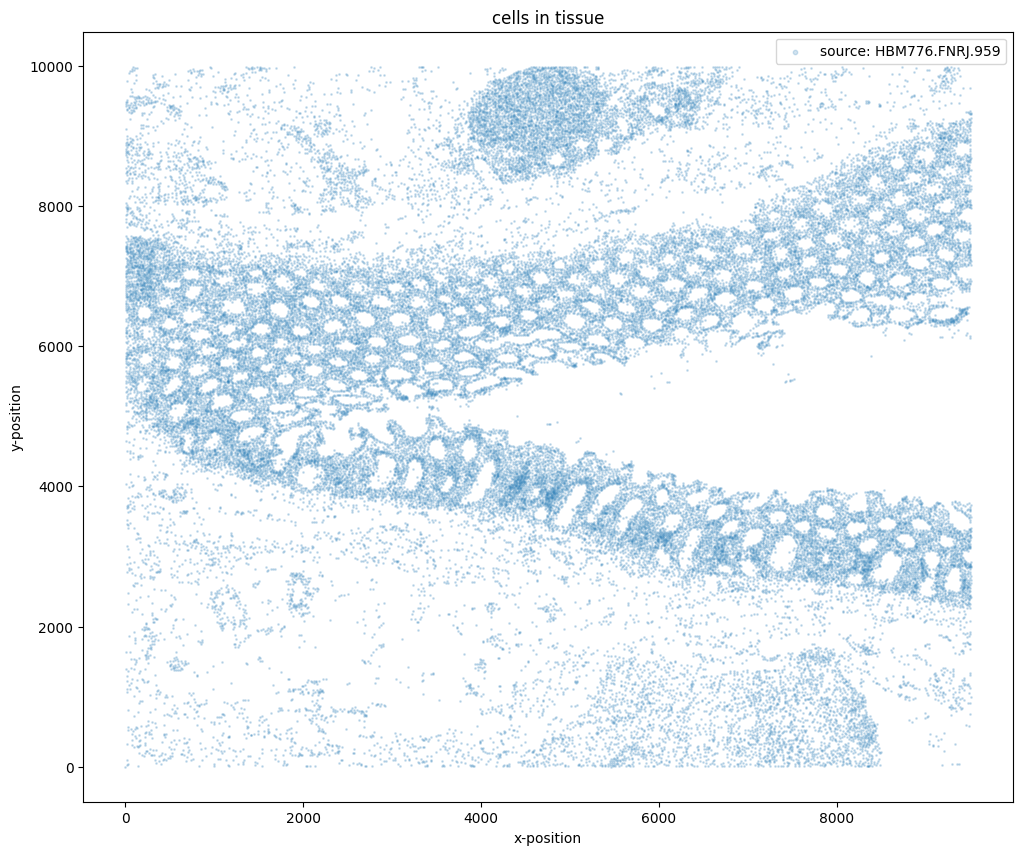

In [27]:
# get cell centroid coordinates
xI = np.array(df_location['x'])
yI = np.array(df_location['y'])

# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.2, label= 'source: ' + source_name)
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_title('cells in tissue')

lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])

## Rasterize cells into image

We will first use `STalign` to rasterize the single cell centroid positions `xI, yI` into an image `I`. Assuming the single-cell centroid coordinates are in microns, we will perform this rasterization at a 30 micron resolution. We can visualize the resulting rasterized image.

Note that points are plotting with the origin at bottom left while images are typically plotted with origin at top left so we've used `invert_yaxis()` to invert the yaxis for visualization consistency. 

0 of 51033
10000 of 51033
20000 of 51033
30000 of 51033
40000 of 51033
50000 of 51033
51032 of 51033


Text(207.23005600968816, 0.5, 'rows')

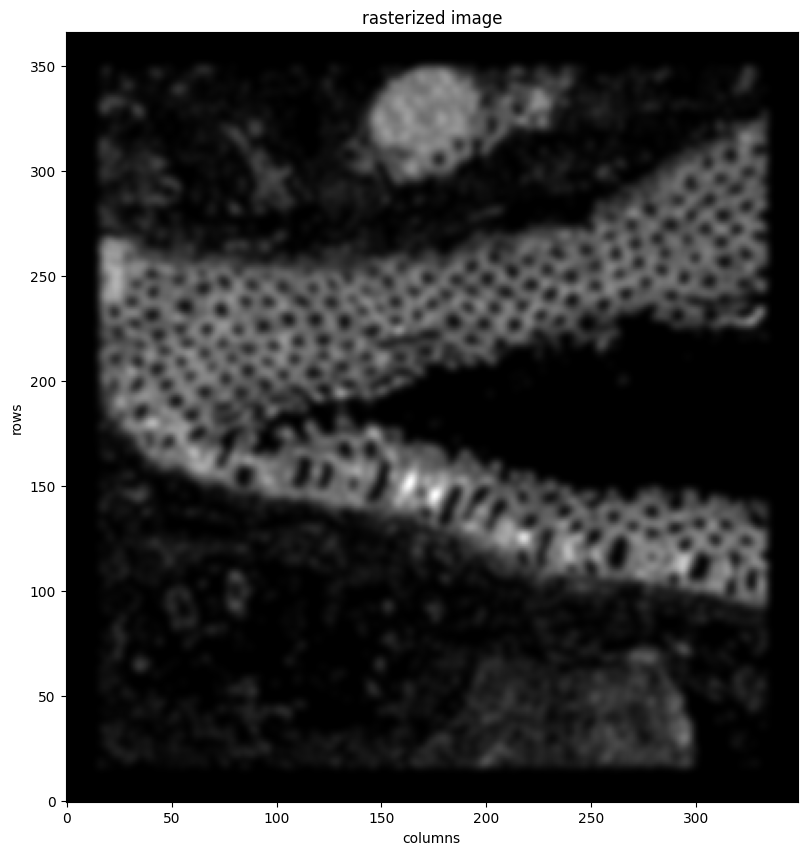

In [29]:
# rasterize at 30um resolution so image looks smooth
XI,YI,I,fig = STalign.rasterize(xI,yI,dx=30)
# get extent of images
extentI = STalign.extent_from_x((YI,XI))

# plot
ax = fig.axes[0]
ax.invert_yaxis()
ax.set_title("rasterized image")
ax.set_xlabel('columns')
ax.set_ylabel('rows')

For setting the parameters of STalign alignment which are related to pixel intensity, it is helpful to have the range of the pixel intensity be normalized to have the range 0 to 1. The code below normalizes the image `I`.

In [16]:
print("The range of I is {} to {}".format(I.min(), I.max() ))

# normalize
I = STalign.normalize(I, t_max=1)
print("The range of I after normalization is {} to {}".format(I.min(), I.max() ))

The range of I is 0.0 to 3.0794940982370123
The range of I after normalization is 0.0 to 1.0


## Results

As shown below the coordinates of the cell centroids from the CODEX data have been rasterized into an images. Now you have a rasterized image that can be aligned to another image from another modality such as histology.

Text(0, 0.5, 'rows')

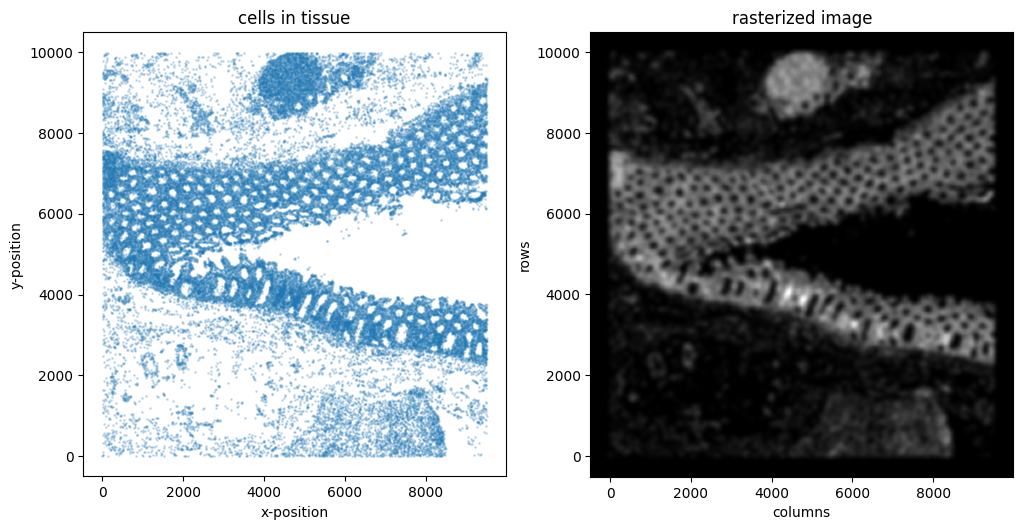

In [28]:
# plot cell centroids and rasterized image side by side
fig,ax = plt.subplots(1,2)
ax[0].scatter(xI,yI,s=1,alpha=0.2, label= 'source: ' + source_name)
ax[0].set_aspect('equal', 'box')
ax[0].set_title("cells in tissue")
ax[0].set_xlabel('x-position')
ax[0].set_ylabel('y-position')


ax[1].imshow(I.transpose(1,2,0).squeeze(), cmap='gray', extent=extentI)
ax[1].invert_yaxis()
ax[1].set_title("rasterized image")
ax[1].set_xlabel('columns')
ax[1].set_ylabel('rows')